In [2]:
import csv
import numpy as np
import pandas as pd
import pylab as p
%matplotlib inline  
train = pd.read_csv('train.csv', header = 0)
test = pd.read_csv('test.csv', header = 0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
train[train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [6]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


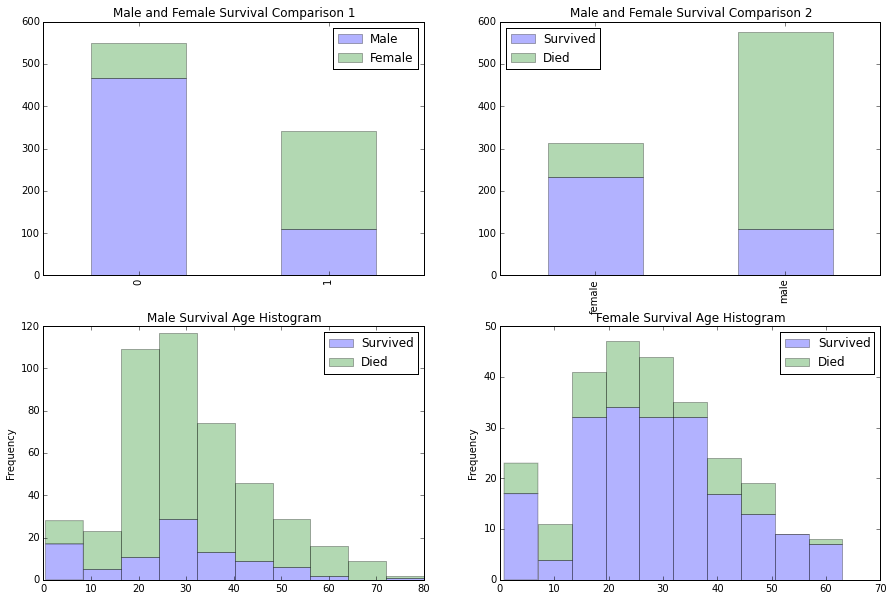

In [7]:
fig, axes = p.subplots(nrows=2, ncols=2, figsize=(15,10))
#compare male and female survival rate
male_female1 = pd.DataFrame({'Male':train[train['Sex'] == 'male']['Survived'].value_counts(),
                             'Female':train[train['Sex'] == 'female']['Survived'].value_counts()}, columns = ['Male','Female'])
male_female1.plot(kind = 'bar', title='Male and Female Survival Comparison 1', alpha = 0.3, stacked = True, ax=axes[0,0])

male_female2 = pd.DataFrame({'Survived':train[train['Survived'] == 1]['Sex'].value_counts(),
                             'Died':train[train['Survived'] == 0]['Sex'].value_counts()}, columns = ['Survived','Died'])
male_female2.plot(kind = 'bar', title='Male and Female Survival Comparison 2', alpha = 0.3, stacked = True, ax=axes[0,1])

#compare male and female survival rate across different age groups
male_survived_age = pd.DataFrame({'Survived':train[(train['Sex'] == 'male') & (train['Survived'] == 1)]['Age'],
                                  'Died':train[(train['Sex'] == 'male') & (train['Survived'] == 0)]['Age']}, columns = ['Survived','Died'])
male_survived_age.plot(kind = 'hist', title='Male Survival Age Histogram', alpha = 0.3, stacked = True, ax=axes[1,0])

female_survived_age = pd.DataFrame({'Survived':train[(train['Sex'] == 'female') & (train['Survived'] == 1)]['Age'],
                                    'Died':train[(train['Sex'] == 'female') & (train['Survived'] == 0)]['Age']}, columns = ['Survived','Died'])
female_survived_age.plot(kind = 'hist', title='Female Survival Age Histogram', alpha = 0.3, stacked = True, ax=axes[1,1])

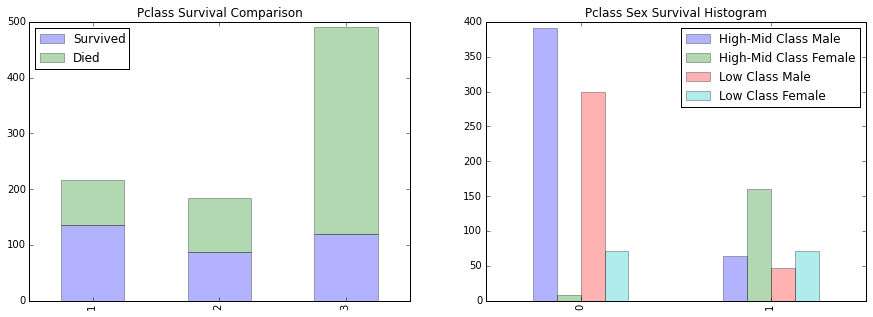

In [11]:
fig, axes = p.subplots(nrows=1, ncols=2, figsize=(15,5))
#compare survival rate of different socio-economic class
survival_pclass = pd.DataFrame({'Survived':train[train['Survived'] == 1]['Pclass'].value_counts(),
                    'Died':train[train['Survived'] == 0]['Pclass'].value_counts()}, columns = ['Survived','Died'])
survival_pclass.plot(kind = 'bar', title='Pclass Survival Comparison', alpha = 0.3, stacked = True, ax=axes[0])

#compare survival rate of different socio-economic class and sex
class_sex = pd.DataFrame({'High-Mid Class Male':train[(train['Sex'] == 'male') & (train['Pclass'] != 1)]['Survived'].value_counts(),
                          'High-Mid Class Female':train[(train['Sex'] == 'female') & (train['Pclass'] != 3)]['Survived'].value_counts(),
                          'Low Class Male':train[(train['Sex'] == 'male') & (train['Pclass'] == 3)]['Survived'].value_counts(),
                         'Low Class Female':train[(train['Sex'] == 'female') & (train['Pclass'] == 3)]['Survived'].value_counts()},
                         columns = ['High-Mid Class Male','High-Mid Class Female','Low Class Male','Low Class Female'])
class_sex.plot(kind = 'bar', title='Pclass Sex Survival Histogram', alpha = 0.3, ax=axes[1])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


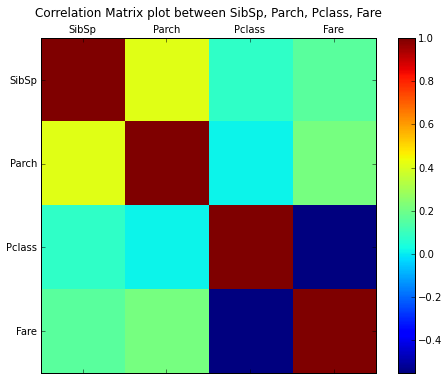

In [9]:
#Generating correlation matrix plot
fig = p.figure(figsize=(8, 6))
correlationplot = fig.add_subplot(111)
axes = ['SibSp','Parch','Pclass','Fare']
class_fare = train[axes].corr()
correlationplot.matshow(class_fare)
correlationplot.set_title("Correlation Matrix plot between SibSp, Parch, Pclass, Fare")
bar = correlationplot.matshow(class_fare, interpolation='nearest')
fig.colorbar(bar)
correlationplot.set_xticklabels(['']+axes)
correlationplot.set_yticklabels(['']+axes)